In [1]:
# import sys
# print (sys.version)

# Import libraries for Finance (Yahoo Finance) and Technical Analysis
import yfinance as yf
import talib

# Import libraries for data handling and visualization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Import internal functions to load data, etc
#import initialize

In [2]:
def init(numberOfStocks = 10, daysSince=14, typeDate='Close'):
    print(f"Requested days: {daysSince}.\nRequested stocks: {numberOfStocks}.\nData type: {typeDate}.")

    tickers_df = pd.read_csv('sp500_tickers.csv').head(numberOfStocks)
    tickers_df.set_index('Ticker', inplace=True)
    tickers_df.sort_values(by='Ticker', inplace=True)

    tickers_string = ' '.join(tickers_df.index.values)
    ts_today = pd.to_datetime('today')
    ts_origin = ts_today - pd.Timedelta(days=daysSince)

    return (yf.download(tickers_string, start=ts_origin, end=ts_today)[typeDate])
    
rawdata = init(numberOfStocks=50, daysSince=60)
rawdata.to_csv('./rawdata.csv')
    

Requested days: 60.
Requested stocks: 50.
Data type: Close.
[*********************100%***********************]  50 of 50 completed


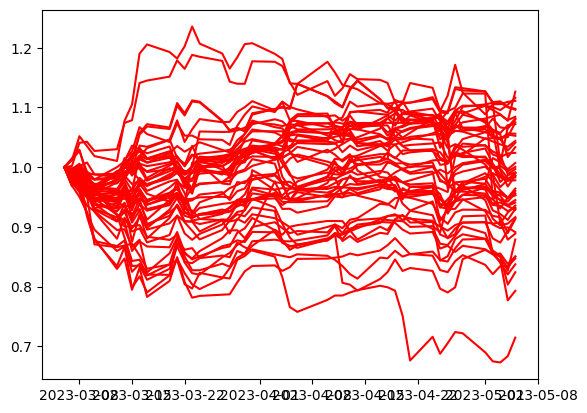

In [3]:
#Normalize the data to the first day.
#rawdata = rawdata / (rawdata.mean(axis=0))
rawdata = rawdata / rawdata.iloc[0]

for x in rawdata.columns:

    plt.plot(rawdata.index, rawdata[x], 'r')

plt.show()

In [5]:
def real2double(real_data):
    return(np.array(real_data,dtype='f8'))

In [6]:
EMA_14 = pd.DataFrame()
EMA_26 = pd.DataFrame()
for x in rawdata.columns:
    # print(x)
    thisEma = talib.EMA(real2double(rawdata[x].values), timeperiod=14)
    EMA_14[x] = thisEma
    thisEma = talib.EMA(real2double(rawdata[x].values), timeperiod=26)
    EMA_26[x] = thisEma

    

# rawdata
emadif = 100*(EMA_14 - EMA_26)/EMA_14

test_positives = (emadif > 0)

In [8]:
def how_many_days_since_EMA14_outweighs_EMA26(x):
    '''For each company, find out when EMA_14 fell below EMA_26 for the last time.
    This is done reverting the (EMA_14 - EMA_26) > 0 array and finding the last FALSE value.'''
    testPosSummary = dict()
    for company in x.columns:
        test_list =(list(test_positives[company]))
        test_list.reverse()
        testPosSummary[company] = test_list.index(False)
    return (testPosSummary)

    
testPosSummary = how_many_days_since_EMA14_outweighs_EMA26(emadif)
testPosSummary_df = pd.DataFrame(testPosSummary, index = [0]).transpose().sort_values(by=0, ascending=False)




Analyzing company A
Analyzing company AAL
Analyzing company AAP
Analyzing company AAPL
Analyzing company ABBV
Analyzing company ABC
Analyzing company ABT
Analyzing company ACGL
Analyzing company ACN
Analyzing company ADBE
Analyzing company ADI
Analyzing company ADM
Analyzing company ADP
Analyzing company AEE
Analyzing company AEP
Analyzing company AES
Analyzing company AFL
Analyzing company AIG
Analyzing company AJG
Analyzing company AKAM
Analyzing company ALB
Analyzing company ALGN
Analyzing company ALK
Analyzing company ALL
Analyzing company ALLE
Analyzing company AMAT
Analyzing company AMCR
Analyzing company AMD
Analyzing company AME
Analyzing company AMGN
Analyzing company AMP
Analyzing company AMT
Analyzing company AMZN
Analyzing company ANET
Analyzing company ANSS
Analyzing company AON
Analyzing company AOS
Analyzing company APA
Analyzing company APD
Analyzing company APH
Analyzing company APTV
Analyzing company ARE
Analyzing company ATVI
Analyzing company AWK
Analyzing company A

In [9]:
# microsoft = talib.EMA(data['High'], timeperiod=30)
# microsoft = talib.EMA(data['High'].values, timeperiod=14)


Company ABT, with 9 periods


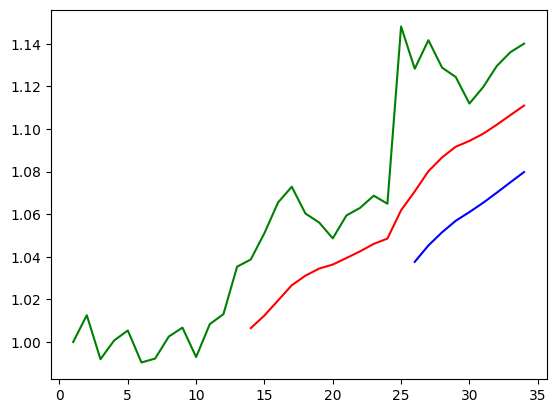

Company ACN, with 9 periods


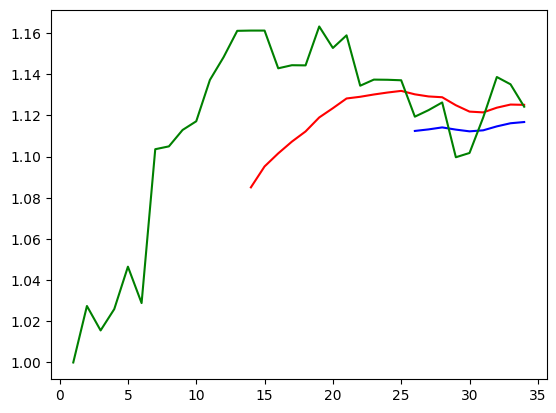

Company AOS, with 9 periods


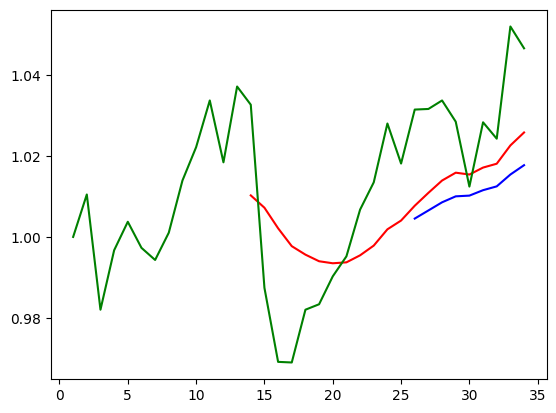

Company MMM, with 9 periods


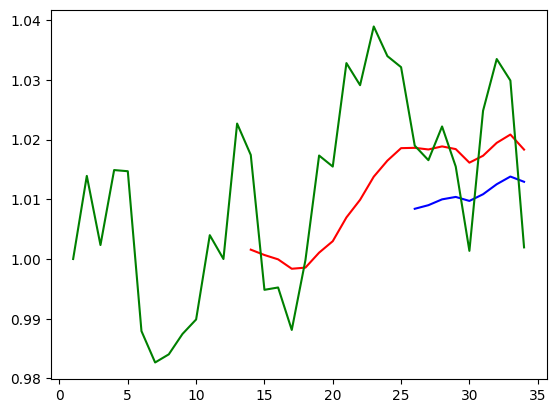

Company ABBV, with 0 periods


In [64]:
x_axis = np.linspace(1,rawdata.shape[0],rawdata.shape[0])

for x in numpos_df.index:
    print(f"Company {x}, with {numpos_df.loc[x][0]} periods")
    if (numpos_df.loc[x][0] >= 4):
        plt.plot(x_axis, EMA_14[x], 'r')
        plt.plot(x_axis, EMA_26[x], 'b')
        plt.plot(x_axis, rawdata[x], 'g')
        plt.show()

In [28]:
a = [1, 2, 3]
b = [4, 5, 6]
test = pd.DataFrame({'colA': a, 'colB': b})

test



,colA,colB
0,1,4
1,2,5
2,3,6


In [32]:
medias = test.mean()
medias

colA    2.0
colB    5.0
dtype: float64

In [34]:
normalized = test / medias
normalized

,colA,colB
0,0.5,0.8
1,1.0,1.0
2,1.5,1.2


In [ ]:
numpos_df.index

Index(['AKAM', 'AES', 'AON', 'ANSS', 'ANET', 'AMZN', 'AMT', 'AMGN', 'AMCR',
       'ATVI', 'AWK', 'GOOG', 'GOOGL', 'AJG', 'LNT', 'APA', 'ABC', 'AEE',
       'ADM', 'ADI', 'ADBE', 'ACN', 'AEP', 'AAPL', 'ACGL', 'ABBV', 'ABT',
       'ALGN', 'AFL', 'APD', 'AOS', 'AAP', 'MO', 'APH', 'APTV', 'AXP', 'MMM',
       'ARE', 'A', 'AMP', 'AME', 'AMD', 'AAL', 'ALLE', 'ALL', 'ALK', 'ALB',
       'AIG', 'ADP', 'AMAT'],
      dtype='object')

NameError: name 'y' is not defined

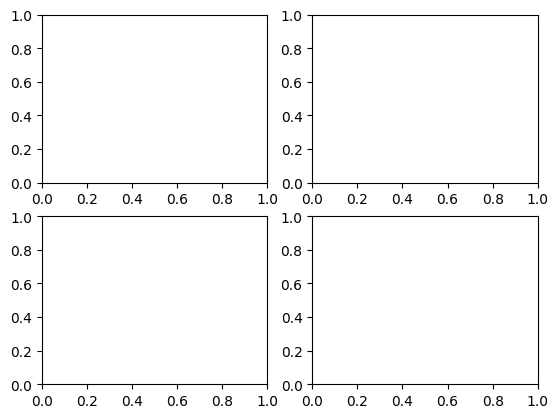

In [28]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()



In [34]:
(numpos_df > 5).value_counts()

True     311
False    190
Name: count, dtype: int64